In [1]:
import time
import sklearn.linear_model
from sklearn.datasets import fetch_openml
import sys
import numpy as np
# np.set_printoptions(threshold=sys.maxsize)

In [2]:
mnist = fetch_openml('mnist_784', version=1)

/Users/zivlazarov/miniforge3/envs/tensorflow-env/lib/python3.8/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
X, y = mnist['data'], mnist['target']

In [4]:
X.shape

(70000, 784)

In [5]:
X.iloc[0, -3:-1]

pixel782    0.0
pixel783    0.0
Name: 0, dtype: float64

In [6]:
# setting pixel values to be in [0, 1] range
# X = X/255.0

In [7]:
#columns = list(X.columns)

In [8]:
#new_columns = ['bias']

In [9]:
# new list for the dataframe's columns
#new_columns.extend(columns)

In [10]:
# creating the bias column
#X['bias'] = 1

In [11]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# reordering the dataframe with the first column to be the bias
#X = X[new_columns]

In [13]:
#X.head()

In [14]:
# getting the correct shape
X.shape

(70000, 784)

In [15]:
y.shape

(70000,)

In [16]:
y.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [17]:
# working with integers instead of strings for convenience
y = y.apply(lambda x : int(x))

In [18]:
y.head()

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, int64): [0, 1, 2, 3, ..., 6, 7, 8, 9]

In [19]:
X, y = X.to_numpy(), y.to_numpy()

In [20]:
import matplotlib.pyplot as plt

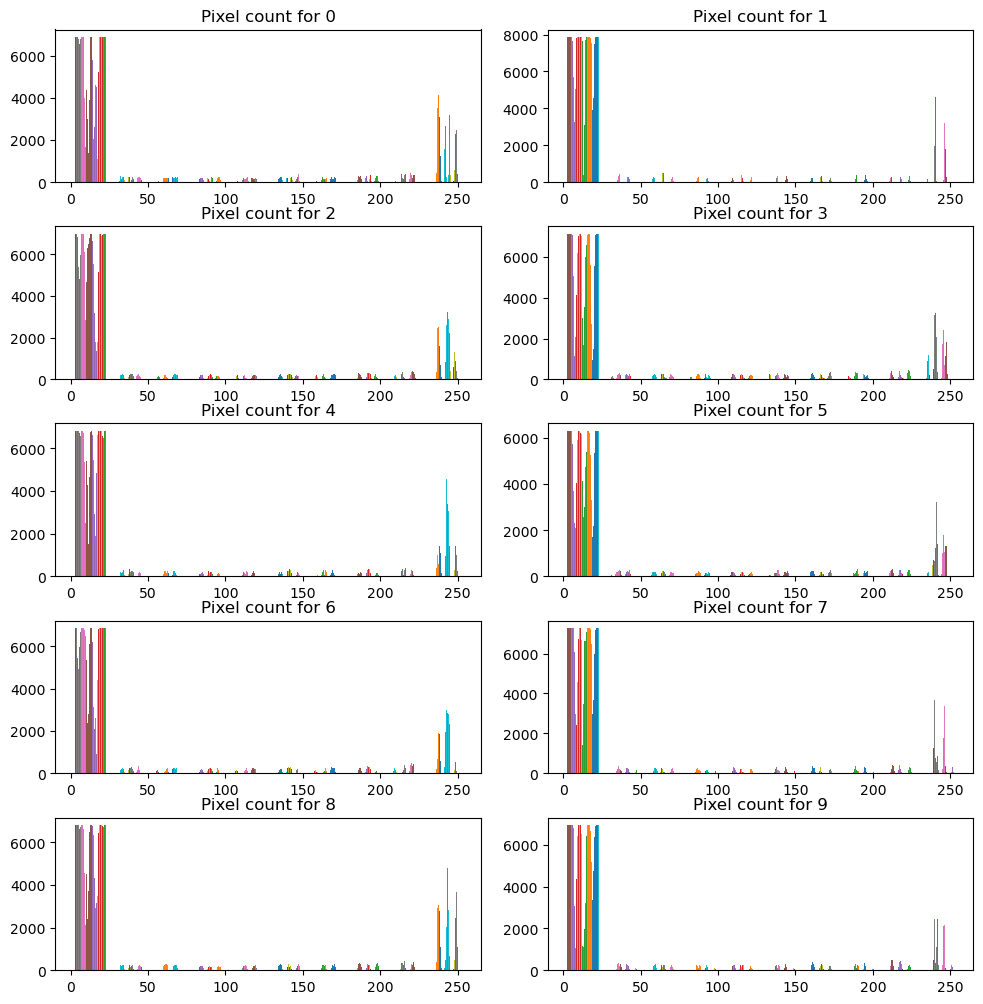

In [21]:
# showing distribution of pixels for every digit
fig, ax = plt.subplots(5, 2, figsize=(10, 10))
fig.tight_layout()
for i in range(len(np.unique(y))):
    ax[i//2, i%2].hist(X[np.where(y == i)][:, :])
    ax[i//2, i%2].set_title(f'Pixel count for {i}')

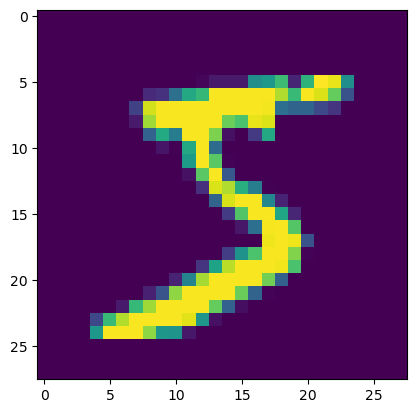

In [22]:
# getting an idea of an image
plt.imshow(X[0, :].reshape(28, 28))

(array([6903., 7877., 6990., 7141., 6824., 6313., 6876., 7293., 6825.,
        6958.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

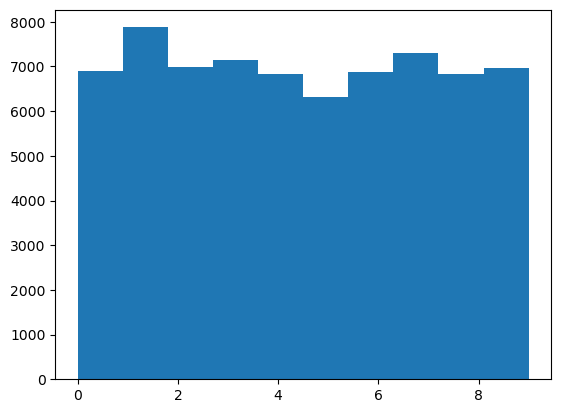

In [23]:
# check distribution of each digit
plt.hist(y)

In [ ]:
# adding the bias column as the first column
X = np.concatenate((np.ones(shape=(X.shape[0],))[:, np.newaxis], X), axis=1)

In [ ]:
np.unique(X[:, 0])

In [ ]:
X.shape

In [220]:
class Perceptron:

    def __init__(self, num_features, classes, epochs=1):
        # num_features includes the extra bias column with the dataset so we'll add it
        self.num_features = num_features
        self.classes = classes
        self.num_classes = len(self.classes)
        self.num_samples = 0
        self.epochs = epochs
        
        # initializing the weights vector for every class with values [-1, 1]
        self.weights = np.random.uniform(low=-1, high=1, size=(self.num_classes, self.num_features))
        # self.weights = np.random.rand(self.num_classes, self.num_features)
        # self.weights = np.zeros(shape=(self.num_classes, self.num_features))
    
        # self.final_weights = np.zeros(shape=(self.num_classes, self.num_features))    
        self.final_weights = np.copy(self.weights)
        # determined by the size of samples
        self.labels = None
                  
    def init_multi_class_labels(self, y_train):
        self.num_samples = y_train.shape[0]
        # initializing the perceptron training labels
        self.labels = np.zeros(shape=(self.num_classes, self.num_samples))
        # setting labels' values based on every class in the training data
        for class_idx in range(self.num_classes):
            self.labels[class_idx, np.where(y_train == class_idx)[0]] = 1
            self.labels[class_idx, np.where(y_train != class_idx)[0]] = -1

    def fit(self, X_train, y_train):
        self.init_multi_class_labels(y_train)
        # defining error value for each class for pocket algorithm
        min_errors = np.full(shape=(self.num_classes,), fill_value=np.inf)
        
        '''
        choosing 16% (arbitrary decision) of the dataset as random samples to calculate errors,
        as we can see from the above cells, the number of occurrences of each digit is 
        distributed almost uniformly, so getting 16% of the samples can distribute the amount of each
        digit in the random sample almost evenly for more general optimization
        '''
        num_random_samples = int(0.16 * self.num_samples)
        
        # traversing the dataset
        for epoch in range(self.epochs):
            for t in range(self.num_samples):
                # predicting the current sample with every weight vector using the np.sign method
                # because probability of the dot product to be exactly 0 is very low
                y_preds = np.sign(self.weights.dot(X_train[t]))

                # dividing classes based on their predictions
                misclassified_classes_indexes = np.where(y_preds != self.labels[:, t])
                # correcting misclassified weight vectors
                self.weights[misclassified_classes_indexes] += \
                    self.labels[misclassified_classes_indexes, t][0][:, np.newaxis] * X_train[t, :]
                    
                # pocketing every 10 samples
                if t % 10 == 0:
                    # getting random indexes for the sampling
                    random_samples_indexes = np.random.choice(self.num_samples, num_random_samples)

                    # calculating the errors from the random samples based on the improved vectors
                    errors_t = np.sum(
                        np.sign(self.weights.dot(X_train[random_samples_indexes, :].T)) \
                            != self.labels[:, random_samples_indexes],
                        axis=1) / num_random_samples

                    # pocketing the improved weight vectors and updating the min errors
                    to_improve_classes_indexes = np.where(errors_t < min_errors)[0]
                    
                    self.final_weights[to_improve_classes_indexes] = \
                        np.copy(self.weights[to_improve_classes_indexes])
                    
                    min_errors[to_improve_classes_indexes] = errors_t[to_improve_classes_indexes]
        
        print(min_errors)
        # setting the trained weight vectors
        self.weights = np.copy(self.final_weights)
                        
    def predict(self, X_test):
        return np.argmax(X_test.dot(self.weights.T), axis=1)
    
    def accuracy(self, predictions, y_test):
        return np.sum(predictions == y_test) / len(y_test)
        

    def error(self, weights, X, y):
        return np.sum(np.sign(weights.dot(X.T)) != y) / self.num_samples


def sign(value):
    return 1 if value >= 0 else -1

In [221]:
from sklearn.model_selection import train_test_split
num_train_samples = 60000

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=num_train_samples/len(X), shuffle=True)

In [223]:
X_train.shape

(60000, 785)

In [225]:
model = Perceptron(num_features=X_train.shape[1], classes=np.unique(y), epochs=3)

In [226]:
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()
end_time - start_time

[0.0065625  0.00427083 0.01760417 0.02427083 0.01416667 0.023125
 0.0109375  0.01197917 0.04947917 0.03864583]


302.8044650554657

In [227]:
predictions = model.predict(X_test)
predictions

array([3, 4, 5, ..., 1, 7, 1])

In [228]:
model.accuracy(predictions, y_test)

0.8954

In [229]:
with open('model_weights.npy', 'wb') as f:
    np.save(f, model.weights)

In [35]:
def confusion_matrix(y_preds, y_true, label):
    # a 2x2 matrix
    confusion_matrix = np.array([[0, 0], [0, 0]])
    # true positive
    confusion_matrix[0, 0] = len(y_preds[(y_preds == y_true & y_true == label)])
    # true negative
    confusion_matrix[1, 1] = len(y_preds[(y_preds == y_true & y_true != label)])
    # false positive
    confusion_matrix[0, 1] = len(y_preds[(y_preds != y_true & y_true != label)])
    # false negative
    confusion_matrix[1, 0] = len(y_preds[(y_preds != y_true & y_true == label)])

    return confusion_matrix